In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("insurance_claims.csv")

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [5]:
data.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

This dataset didn't have any missing values.So I introdued missing values into the data 

In [6]:
#np.random.seed(42)
#df=data.mask(np.random.random(data.shape)<0.09)

In [7]:
#(df.isna().sum().sum()/np.product(df.shape))*100

In [8]:
#df.to_csv('insurance_new.csv', index=False, header=True)

In [9]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# TYPES OF VARIABLES:

In [10]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
#data.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)

In [12]:
temporal=['incident_date','auto_year','policy_bind_date']
temporal

['incident_date', 'auto_year', 'policy_bind_date']

In [13]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
Street_no=[]
for i in data['incident_location']:
    Street_no.append(i.split(' ')[0])
data['street_no']=Street_no    

In [15]:
Street_name=[]
for i in data['incident_location']:
    Street_name.append(i[5:])
data['Street_name']=Street_name

In [16]:
data.drop('incident_location',axis=1,inplace=True)

In [17]:
data.drop('street_no',axis=1,inplace=True)

In [18]:
data.drop('total_claim_amount',axis=1,inplace=True)

In [19]:
#data.drop('months_as_customer',axis=1,inplace=True)

In [20]:
categorical=[i for i in data.columns if data[i].dtypes=='O' and i not in temporal]
len(categorical)

19

In [21]:
for var in categorical:
    print("{a}: {b}".format(a=var,b=data[var].unique()))
    print ('\n')

policy_state: ['OH' 'IN' 'IL']


policy_csl: ['250/500' '100/300' '500/1000']


insured_sex: ['MALE' 'FEMALE']


insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']


insured_hobbies: ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']


insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']


incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


collision_type: ['Side Collision' '?' 'Rear Collision' 'Front Collision']


incident_sev

In [22]:
discrete=[i for i in data.columns if data[i].dtypes=='int64' and i not in temporal ]
len(discrete)

15

In [23]:
continuous=[i for i in data.columns if data[i].dtypes=='float64']
len(continuous)

1

In [24]:
for var in discrete:
    if '?' in data[var]:
        print ('{}-True'.format(var))
    else: 
        print('False')

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [25]:
data['police_report_available'].replace('?',np.nan,inplace=True)
data['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [26]:
data['property_damage'].replace('?',np.nan,inplace=True)
data['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [27]:
data['collision_type'].replace('?',np.nan,inplace=True)
data['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

# VARIABLE DISTRIBUTIONS:

In [28]:
#data[discrete[:]].hist(bins=30)

In [29]:
# fig, axs = plt.subplots(ncols=2, nrows=9,figsize=(14,14))
# axs = axs.flatten() 

# for i, var in enumerate(discrete):
#     sns.countplot(data[data[var].notnull()][var], ax=axs[i]);

In [30]:
# fig, axs = plt.subplots(ncols=3, nrows=7,figsize=(14,14))
# axs = axs.flatten()

# for i, var in enumerate(categorical):
#     sns.countplot(data[data[var].notnull()][var], ax=axs[i]);

In [31]:
cor=data.corr()
cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.165768,0.179536,0.215626,0.021368


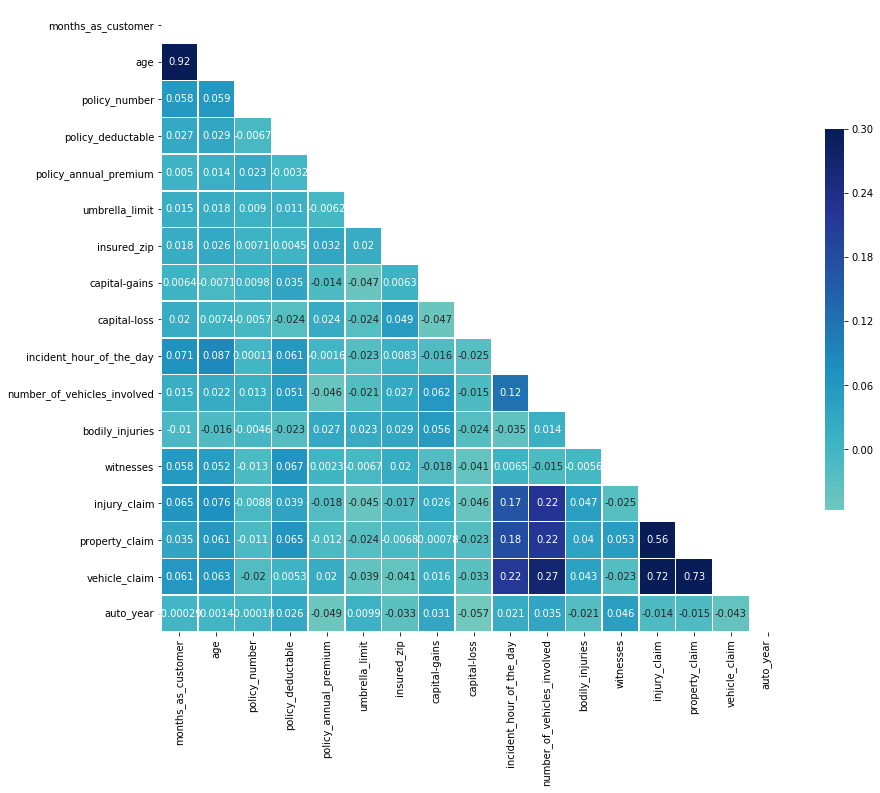

In [32]:
mask = np.triu(np.ones_like(cor, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,14))


# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap='YlGnBu', vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# MISSING VALUES :


In [33]:
data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
b

In [34]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [35]:
for i in data.columns:
    print("{}:{}".format(i,data[i].isnull().sum()))

months_as_customer:0
age:0
policy_number:0
policy_bind_date:0
policy_state:0
policy_csl:0
policy_deductable:0
policy_annual_premium:0
umbrella_limit:0
insured_zip:0
insured_sex:0
insured_education_level:0
insured_occupation:0
insured_hobbies:0
insured_relationship:0
capital-gains:0
capital-loss:0
incident_date:0
incident_type:0
collision_type:178
incident_severity:0
authorities_contacted:0
incident_state:0
incident_city:0
incident_hour_of_the_day:0
number_of_vehicles_involved:0
property_damage:360
bodily_injuries:0
witnesses:0
police_report_available:343
injury_claim:0
property_claim:0
vehicle_claim:0
auto_make:0
auto_model:0
auto_year:0
fraud_reported:0
Street_name:0


In [36]:
for i in data.columns:
    print("{}:{}".format(i,data[i].isnull().mean()))

months_as_customer:0.0
age:0.0
policy_number:0.0
policy_bind_date:0.0
policy_state:0.0
policy_csl:0.0
policy_deductable:0.0
policy_annual_premium:0.0
umbrella_limit:0.0
insured_zip:0.0
insured_sex:0.0
insured_education_level:0.0
insured_occupation:0.0
insured_hobbies:0.0
insured_relationship:0.0
capital-gains:0.0
capital-loss:0.0
incident_date:0.0
incident_type:0.0
collision_type:0.178
incident_severity:0.0
authorities_contacted:0.0
incident_state:0.0
incident_city:0.0
incident_hour_of_the_day:0.0
number_of_vehicles_involved:0.0
property_damage:0.36
bodily_injuries:0.0
witnesses:0.0
police_report_available:0.343
injury_claim:0.0
property_claim:0.0
vehicle_claim:0.0
auto_make:0.0
auto_model:0.0
auto_year:0.0
fraud_reported:0.0
Street_name:0.0


# FREQUENCY DISTRIBUTIONS

In [37]:
 data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [38]:
data[categorical].nunique()

policy_state                 3
policy_csl                   3
insured_sex                  2
insured_education_level      7
insured_occupation          14
insured_hobbies             20
insured_relationship         6
incident_type                4
collision_type               3
incident_severity            4
authorities_contacted        5
incident_state               7
incident_city                7
property_damage              2
police_report_available      2
auto_make                   14
auto_model                  39
fraud_reported               2
Street_name                156
dtype: int64

In [39]:
for i in range(len(categorical)):
    print(categorical[i])
    freq_categorical_country = 100*(data[categorical[i]].value_counts() / len(data))
    print(freq_categorical_country.map('{:,.2f} %'.format))

policy_state
OH    35.20 %
IL    33.80 %
IN    31.00 %
Name: policy_state, dtype: object
policy_csl
250/500     35.10 %
100/300     34.90 %
500/1000    30.00 %
Name: policy_csl, dtype: object
insured_sex
FEMALE    53.70 %
MALE      46.30 %
Name: insured_sex, dtype: object
insured_education_level
JD             16.10 %
High School    16.00 %
Associate      14.50 %
MD             14.40 %
Masters        14.30 %
PhD            12.50 %
College        12.20 %
Name: insured_education_level, dtype: object
insured_occupation
machine-op-inspct    9.30 %
prof-specialty       8.50 %
tech-support         7.80 %
exec-managerial      7.60 %
sales                7.60 %
craft-repair         7.40 %
transport-moving     7.20 %
priv-house-serv      7.10 %
other-service        7.10 %
armed-forces         6.90 %
adm-clerical         6.50 %
protective-serv      6.30 %
handlers-cleaners    5.40 %
farming-fishing      5.30 %
Name: insured_occupation, dtype: object
insured_hobbies
reading           6.40 %
paint

In [40]:
data1=data.copy()

In [41]:
data1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Street_name
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,6510,13020,52080,Saab,92x,2004,Y,4th Drive
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,780,780,3510,Mercedes,E400,2007,Y,MLK Hwy
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,7700,3850,23100,Dodge,RAM,2007,N,Francis Lane
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Maple Drive
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,1300,650,4550,Accura,RSX,2009,N,3rd Ave


In [42]:
#pip install pandas-profiling

In [43]:
# import pandas_profiling as pp
# pp.ProfileReport(data)

# OUTLIERS:

In [44]:
# fig, axs = plt.subplots(ncols=2, nrows=13,figsize=(14,14))
# axs = axs.flatten()

# for i, var in enumerate(continuous):
#     sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

In [45]:
# fig, axs = plt.subplots(ncols=2, nrows=13,figsize=(14,14))
# axs = axs.flatten()

# for i, var in enumerate(discrete):
#     sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

# MISSING VALUES IMPUTATIONS OF CATEGORICAL VARIABLES:


In [46]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'Street_name'],
      dtype='object')

In [47]:
data[categorical].isnull().sum()

policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
property_damage            360
police_report_available    343
auto_make                    0
auto_model                   0
fraud_reported               0
Street_name                  0
dtype: int64

In [48]:
# for i in categorical:
#     data[i].fillna(method='bfill',inplace=True)
    
# #data['Gender'].fillna(method='ffill',inplace=True)
# data[categorical].isnull().sum()


In [49]:
data['incident_date']

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [50]:
data['datetime'] = pd.to_datetime(data['policy_bind_date'], format='%d-%m-%Y')
data['datetime']=data['datetime'].values.astype(np.int64) // 10 ** 9
data['datetime']

0      1413504000
1      1151366400
2       968198400
3       643593600
4      1402012800
          ...    
995     679622400
996    1388880000
997    1045440000
998    1321574400
999     847670400
Name: datetime, Length: 1000, dtype: int64

In [51]:
data['incident_datetime'] = pd.to_datetime(data['incident_date'], format='%d-%m-%Y')
data['incident_datetime']=data['incident_datetime'].values.astype(np.int64) // 10 ** 9
data['incident_datetime']

0      1422144000
1      1421798400
2      1424563200
3      1420848000
4      1424131200
          ...    
995    1424563200
996    1422057600
997    1421971200
998    1424908800
999    1424908800
Name: incident_datetime, Length: 1000, dtype: int64

In [52]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'Street_name', 'datetime', 'incident_datetime'],
      dtype='object')

In [53]:
import missingno as msno

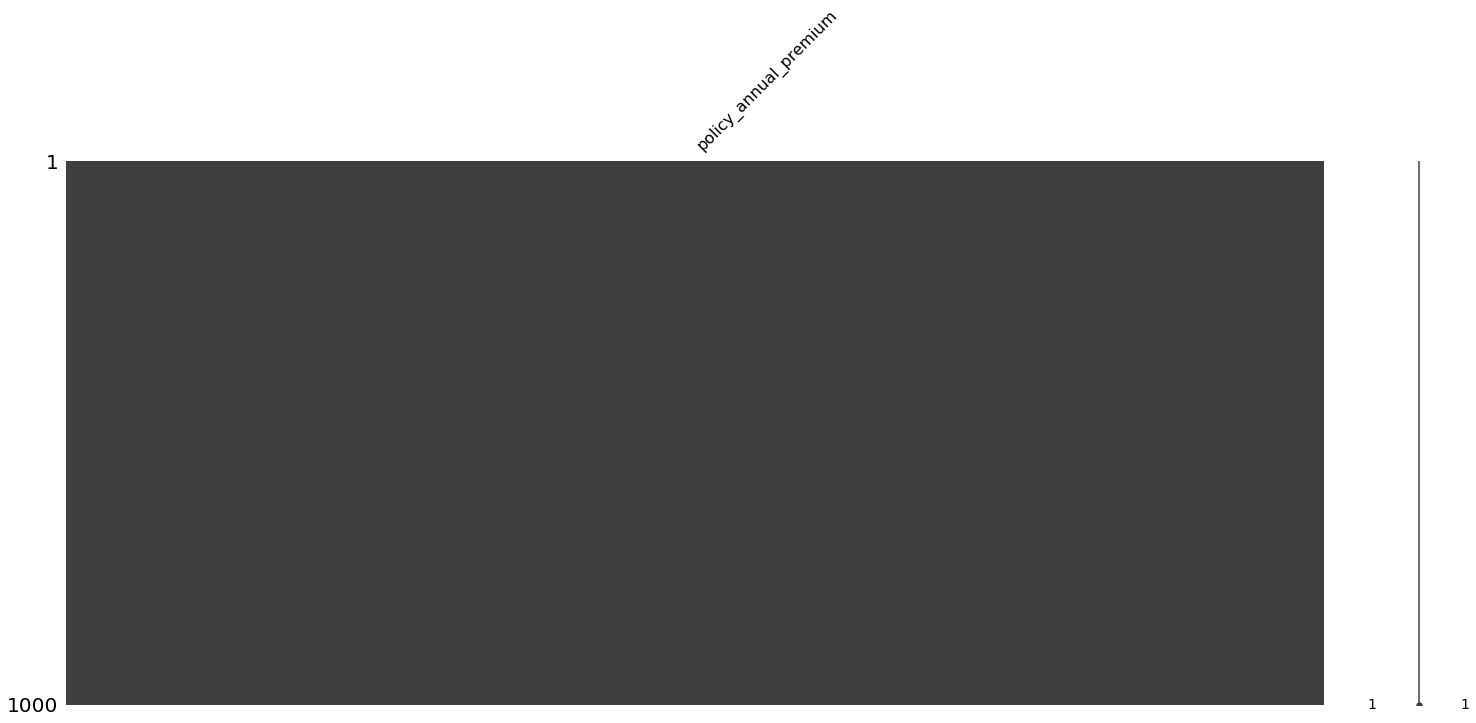

In [54]:
msno.matrix(data[continuous])

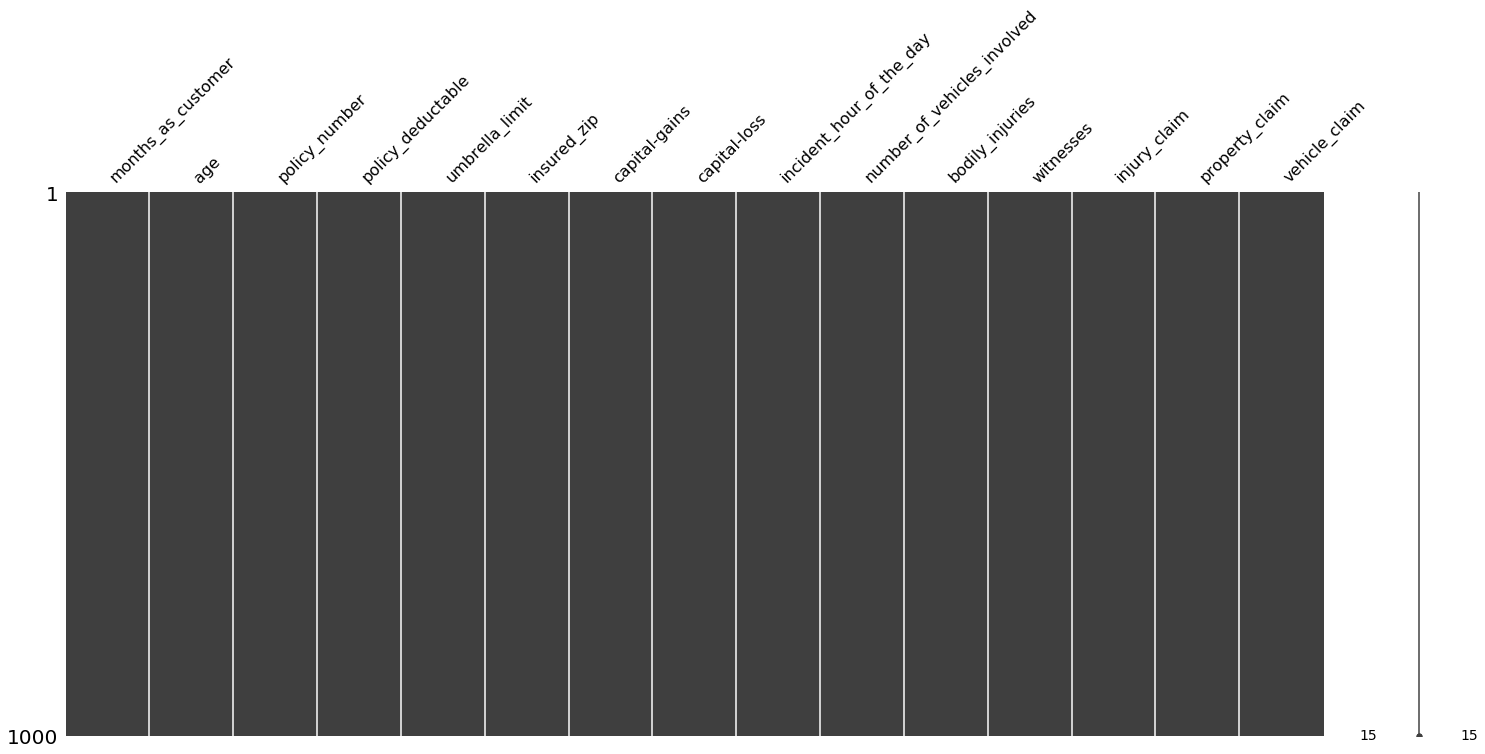

In [55]:
msno.matrix(data[discrete])

C:\Users\14695\AppData\Local\Continuum\anaconda3\envs\buan6341_2020\lib\site-packages\scipy\cluster\hierarchy.py:2837: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


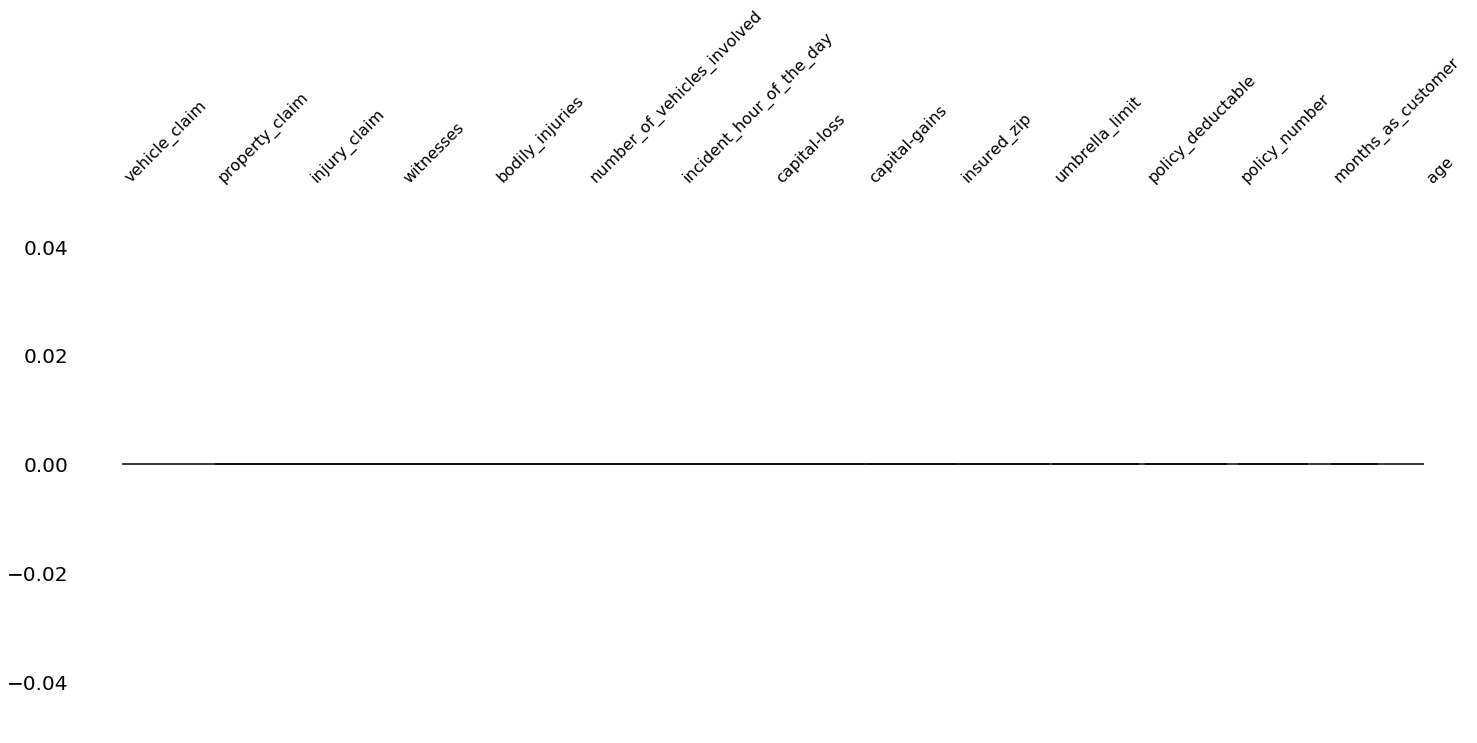

In [56]:
msno.dendrogram(data[discrete])

In [57]:
categorical


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'Street_name']

# ENCODING CATEGORICAL VARIABLES USING GET_DUMMIES


In [58]:
label=['auto_make','auto_model','insured_hobbies','insured_occupation','Street_name']


In [59]:
onehot=[var for var in categorical if var not in label and var!='fraud_reported']

In [60]:
onehot

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available']

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [62]:
data[temporal].dtypes

incident_date       object
auto_year            int64
policy_bind_date    object
dtype: object

In [63]:
data['incident_date']

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [64]:
incident_month=[]
for i in data['incident_date']:
    incident_month.append(i[3:5])
    

In [65]:
incident_year=[]
for i in data['incident_date']:
    incident_year.append(i[6:])

In [66]:
policy_bind_month=[]
for i in data['policy_bind_date']:
    policy_bind_month.append(i[3:5])

In [67]:
policy_year=[]
for i in data['policy_bind_date']:
    policy_year.append(i[6:])

In [68]:
#data.drop('incident_date',axis=1,inplace=True)
#data.drop('policy_bind_date',axis=1,inplace=True)
data.drop('datetime',axis=1,inplace=True)

In [69]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'Street_name', 'incident_datetime'],
      dtype='object')

In [70]:
data.drop('incident_date',axis=1,inplace=True)
data.drop('policy_bind_date',axis=1,inplace=True)

In [71]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'Street_name', 'incident_datetime'],
      dtype='object')

# SPLITTING DATA INTO TRAIN AND TEST DATA SETS

In [72]:
X=data.drop('fraud_reported',axis=1)
X

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Street_name,incident_datetime
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,6510,13020,52080,Saab,92x,2004,4th Drive,1422144000
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NaN,780,780,3510,Mercedes,E400,2007,MLK Hwy,1421798400
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,7700,3850,23100,Dodge,RAM,2007,Francis Lane,1424563200
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Maple Drive,1420848000
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,1300,650,4550,Accura,RSX,2009,3rd Ave,1424131200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,NaN,17440,8720,61040,Honda,Accord,2006,Andromedia St,1424563200
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,NaN,18080,18080,72320,Volkswagen,Passat,2015,Texas Drive,1422057600
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,7500,7500,52500,Suburu,Impreza,1996,5th St,1421971200
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,5220,5220,36540,Audi,A5,1998,Elm Lane,1424908800


In [92]:


    # Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
data['fraud_reported']= label_encoder.fit_transform(data['fraud_reported']) 

data['fraud_reported'].unique() 


array([1, 0], dtype=int64)

In [95]:
y=data['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [97]:
X_train.shape

(600, 36)

In [98]:
y_train.shape

(600,)

In [99]:
y_train.dtypes

dtype('int64')

In [100]:
#data['fraud_reported'].fillna(method='ffill',inplace=True)
data['fraud_reported'].isnull().any()

False

# MISSING VALUES IMPUTATIONS OF NUMERICAL VARIABLES

In [101]:
#from feature_engine.missing_data_imputers import MeanMedianImputer

In [102]:
#

In [103]:
#X_train=median_imputer.transform(X_train)
#

In [104]:
#median_imputer.imputer_dict_

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 24 to 102
Data columns (total 36 columns):
months_as_customer             600 non-null int64
age                            600 non-null int64
policy_number                  600 non-null int64
policy_state                   600 non-null object
policy_csl                     600 non-null object
policy_deductable              600 non-null int64
policy_annual_premium          600 non-null float64
umbrella_limit                 600 non-null int64
insured_zip                    600 non-null int64
insured_sex                    600 non-null object
insured_education_level        600 non-null object
insured_occupation             600 non-null object
insured_hobbies                600 non-null object
insured_relationship           600 non-null object
capital-gains                  600 non-null int64
capital-loss                   600 non-null int64
incident_type                  600 non-null object
collision_type                 492

In [106]:
for i in X_train.columns:
    print("{}:{}".format(i,X_train[i].isnull().any()))
#X_train.isnull().any()

months_as_customer:False
age:False
policy_number:False
policy_state:False
policy_csl:False
policy_deductable:False
policy_annual_premium:False
umbrella_limit:False
insured_zip:False
insured_sex:False
insured_education_level:False
insured_occupation:False
insured_hobbies:False
insured_relationship:False
capital-gains:False
capital-loss:False
incident_type:False
collision_type:True
incident_severity:False
authorities_contacted:False
incident_state:False
incident_city:False
incident_hour_of_the_day:False
number_of_vehicles_involved:False
property_damage:True
bodily_injuries:False
witnesses:False
police_report_available:True
injury_claim:False
property_claim:False
vehicle_claim:False
auto_make:False
auto_model:False
auto_year:False
Street_name:False
incident_datetime:False


In [107]:
X_train.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
p

In [108]:
y_train.isnull().any()

False

In [109]:
y_test.isnull().any()

False

In [110]:
y_train.head()

24     0
467    0
539    0
531    0
618    0
Name: fraud_reported, dtype: int64

In [111]:
cat=[ var for var in categorical if var!='fraud_reported']

In [112]:
data[cat].dtypes

policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
Street_name                object
dtype: object

# SCALING THE DATA

In [113]:
# from sklearn.preprocessing import StandardScaler
# # set up the scaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [114]:
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from feature_engine import variable_transformers as vt
from sklearn.preprocessing import RobustScaler
from feature_engine.variable_transformers import ReciprocalTransformer as rt

from feature_engine import outlier_removers as outr
from feature_engine.outlier_removers import Winsorizer
from feature_engine.outlier_removers import ArbitraryOutlierCapper
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler



In [115]:
patent_preprocess = Pipeline([
    
    #('imputer', mdi.CategoricalVariableImputer(variables=['collision_type','police_report_available','property_damage'])),
   #('imputer', mdi.RandomSampleImputer(random_state=cat,seed='observation')),
    ('imputer', mdi.FrequentCategoryImputer(variables=['collision_type','police_report_available','property_damage'])),
   
    
    # categorical encoding 
    #('rare_label_enc', ce.RareLabelCategoricalEncoder(
             #tol=0.0006,n_categories=20, variables=label)),
     #('encoder',ce.OrdinalCategoricalEncoder(encoding_method='ordered',variables=['incident_severity','insured_education_level'])),
     ('categorical_enc', ce.OneHotCategoricalEncoder(
     top_categories=20,
     variables=cat,
     drop_last=True)),
   
    ('disc' , dsc.EqualWidthDiscretiser(bins=7, variables=discrete)),
    #('capper',  outr.Winsorizer(distribution='skewed', tail='left', fold=1.5, variables=discrete)),
    ('discr', dsc.DecisionTreeDiscretiser(cv=7,
                              scoring='roc_auc',
                              variables=discrete,
                              param_grid=({'max_depth':range(1,10)}), 
                              regression=False)),
    ('yjt',vt.PowerTransformer(variables=discrete, exp=0.5)),
   # ('yjt', vt.YeoJohnsonTransformer(variables =discrete)),
    
    ('discretisation', dsc.EqualWidthDiscretiser(bins=10, variables=continuous)),
    ('scaler',StandardScaler()),

#     ('scaler_mean',MaxAbsScaler(with_centering=False,
#                              with_scaling=True,
#                              quantile_range=(0, 50))),

     
])

In [116]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 FrequentCategoryImputer(variables=['collision_type',
                                                    'police_report_available',
                                                    'property_damage'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=20,
                                          variables=['policy_state',
                                                     'policy_csl',
                                                     'insured_sex',
                                                     'insured_education_level',
                                                     'insured_occupation',
                                                     'insured_hobbies',
                                                     'insured_relation...
                                             'capital-gains', 'capital-loss',
                               

In [122]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [123]:
y_train

24     0
467    0
539    0
531    0
618    0
      ..
106    1
270    0
860    0
435    0
102    0
Name: fraud_reported, Length: 600, dtype: int64

In [248]:

    print(ok[i].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [124]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.5197610709278521

Naive Algorithm Test Performance:  0.595


# LOGISTIC REGRESSION

In [125]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
clf=scale.fit(X_train,y_train)
clf = LogisticRegression()

cv_scores = cross_val_score(clf, X_train, y_train,cv=7,scoring = 'roc_auc')
c_space = np.logspace(-3,2,10)
pen=['l1','l2','elasticnet']#'l2','l1','elasticnet']
param_grid = {'C': c_space,'penalty':pen,'solver':['lbfgs','liblinear']}

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print("Number of Iterations:{}".format(len(cv_scores)))
print("Mean Accuracy:{}".format(cv_scores.mean()))

clf_cv=GridSearchCV(clf,param_grid,cv=7,scoring = 'roc_auc')
clf_cv=clf_cv.fit(X_train,y_train)

# Print Co-efficients
#print("Logistic.coef_:", clf.coef_)
#print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance-train: ", clf_cv.score(X_train,y_train))
print("Logistic Performance-test: ", clf_cv.score(X_test,y_test))


Mean Cross-validation scores: 0.8314220932249211
Number of Iterations:7
Mean Accuracy:0.8314220932249211
Logistic Performance-train:  0.9495868297995004
Logistic Performance-test:  0.852116801825414


# K NEIGHBORS CLASSIFIER 

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(1,10),'n_jobs':[-1]}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring = 'roc_auc')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_knn.best_score_))
print()

#find best parameters 
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance-train: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance-test: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.7021

KNN parameters:  {'n_jobs': -1, 'n_neighbors': 8}
KNN Test Performance-train:  0.861836205239895
KNN Test Performance-test:  0.6740618543985692


# DECISION TREE CLASSIFIER

In [136]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,10),'max_leaf_nodes':range(2,10)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)


# Check test data set performance
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))
print("Decision Tree  Test Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.88

Decision Tree parameters:  {'max_depth': 3, 'max_leaf_nodes': 4}
Decision Tree Train Performance:  0.8790756517839984
Decision Tree  Test Performance:  0.8722210230951867


# SUPPORT VECTOR CLASSIFIER

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#define a list of parameters

param_grid_rbf= [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,20000],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
#param_grid_linear=[{'kernel': ['linear'],
              # 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
              
param_grid_sig=[{'kernel': ['sigmoid'],'gamma': np.logspace(-5,5,10)}]

param_grid_poly=[{'kernel':['poly'],
               #'C':[0.001,0.01,0.1,0.25,0.5,1,10],
               'degree':[1,2,3]}]
               #'gamma':[0.1,1,2,5,10,50]}]
    
c=[0.001, 0.01, 0.1, 1, 10, 100]
param_LinearSVC=[{'C': c }]

#print("List of grids:\n{}".format(param_grid))

## RBF KERNEL

In [138]:
grid_search = GridSearchCV(SVC(), param_grid_rbf, cv=3,
                          return_train_score=True,scoring = 'f1_micro')
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.965
test score:  0.7725000000000001
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.82


## SIGMOID KERNEL

In [139]:
grid_search = GridSearchCV(SVC(),param_grid_sig, cv=10,
                          return_train_score=True,scoring = 'f1_micro')
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


train score:  0.7250000000000001
test score:  0.7699999999999999
Best parameters: {'gamma': 0.021544346900318846, 'kernel': 'sigmoid'}
Best cross-validation score: 0.84


## POLYNOMIAL KERNEL

In [140]:
grid_search = GridSearchCV(SVC(), param_grid_poly, cv=3,
                          return_train_score=True,scoring = 'f1_micro')
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.92
test score:  0.78
Best parameters: {'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.83


# LINEAR SUPPORT VECTOR CLASSIFIER

In [141]:
from sklearn.svm import LinearSVC
grid_search = GridSearchCV(LinearSVC(), param_LinearSVC, cv=3,
                          return_train_score=True,scoring = 'f1_micro')
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.9116666666666666
test score:  0.7975
Best parameters: {'C': 0.001}
Best cross-validation score: 0.82


In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [100,200,300,500],
    'max_features': ['auto'],
    'max_depth' : [2,4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring = 'roc_auc')
rfc_grid.fit(X_train,y_train)
X_train_rfc = rfc_grid.predict(X_train)
X_test_rfc = rfc_grid.predict(X_test)


print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

print(rfc_grid.score(X_test,y_test))

Best Mean Cross Validation Score is 0.8794527320379528
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 300}
Train score is 0.9857152008199346
Test score is 0.8445931361968487
0.8445931361968487


For this dataset,Logistic regression works the best with a test performance score of 88.89%

In [143]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
etc_grid.fit(X_train,y_train)
X_train_etc = etc_grid.predict(X_train)
X_test_etc = etc_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8750720072271203
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 500}
Train score is 0.990343347639485
Test score is 0.8450556566248342


In [107]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.1,0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
gbc_grid.fit(X_train,y_train)
X_train_gbc = gbc_grid.predict(X_train)
X_test_gbc = gbc_grid.predict(X_test)

# print('train mse: {}'.format(mean_squared_error(y_train, X_train_gbc)))
# print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_gbc))))
# print('train r2: {}'.format(r2_score(y_train, X_train_gbc)))
# print()
# print('test mse: {}'.format(mean_squared_error(y_test, X_test_gbc)))
# print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_gbc))))
# print('test r2: {}'.format(r2_score(y_test, X_test_gbc)))
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8957514595354906
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9789731599513164
Test score is 0.848940828219913


In [ ]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,8],
              'n_estimators' : [25,50,100,150],
              'learning_rate' : [0.05,0.09,0.1,0.2,0.5],
               'min_child_weight' : [1,3,5,7],
               'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
xgbc_grid.fit(X_train,y_train)
X_train_xgbc = etc_grid.predict(X_train)
X_test_xgbc = etc_grid.predict(X_test)

# print('train mse: {}'.format(mean_squared_error(y_train, X_train_xgbc)))

# print('train r2: {}'.format(r2_score(y_train, X_train_xgbc)))
# print()
# print('test mse: {}'.format(mean_squared_error(y_test, X_test_xgbc)))

# print('test r2: {}'.format(r2_score(y_test, X_test_xgbc)))
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')


In [109]:
classifiers={'knn':grid_knn ,
             'dtree':grid_dtree,
             'svm':grid_search,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [110]:
classifiers.keys()

dict_keys(['knn', 'dtree', 'svm', 'rfc', 'etc', 'gbc', 'xgbc'])

In [111]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
6,xgbc,0.899407,0.032219
5,gbc,0.895751,0.034457
1,dtree,0.878311,0.034340
3,rfc,0.877511,0.033808
4,etc,0.875539,0.033752
2,svm,0.828333,0.014337
0,knn,0.717675,0.048206


In [112]:
from sklearn.ensemble import StackingClassifier

In [116]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                                ('rfc', rfc_grid.best_estimator_), 
                               #('gbc', gbc_grid.best_estimator_),
                               #('adc_dtree',adc_dtree_grid.best_estimator_),
                               ('dtree', grid_dtree.best_estimator_)
                              ], final_estimator=DecisionTreeClassifier())
sclf1_param = {
              'final_estimator__criterion' : ["gini", "entropy"],
              'final_estimator__splitter' :   ["best", "random"],
                 'final_estimator__max_depth' : [2,4,6],

              }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8583333333333332
Best Mean Cross Validation Score is {'final_estimator__criterion': 'gini', 'final_estimator__max_depth': 6, 'final_estimator__splitter': 'random'}
Train score is 0.81
Test score is 0.815


# Cost Sensitive Algorithms:

In [126]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

Best parameters: {'class_weight': {0: 100, 1: 1}}
Best Mean cross-validation score: 0.82


In [130]:
from sklearn import svm

In [132]:
svc = svm.SVC()
param_grid = {
    
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

#apply grid search
grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(grid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_svc.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.87


In [134]:
from  xgboost import XGBClassifier
xgboost = XGBClassifier()
param_grid = {
    
    'scale_pos_weight': [1, 10, 25],#, 50, 75, 99, 100, 1000],
}

#apply grid search
grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 10}
Best Mean cross-validation score: 0.88


In [252]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.812


In [253]:
etc= ExtraTreesClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(etc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.820


In [255]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [254]:

from imblearn.ensemble import BalancedBaggingClassifier
# define model
bag_dtree = BalancedBaggingClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(bag_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

ModuleNotFoundError: No module named 'imblearn'

# Data Sampling

In [278]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__max_depth': [2,3,4,5,6],
}

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__max_depth': 3, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.85


In [281]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', KNeighborsClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__n_neighbors': range(1,10),
}

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__n_neighbors': 7, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.62


In [282]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', SVC())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
    'model__kernel': ['sigmoid'],
     'model__gamma': np.logspace(-5,5,10)
}

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__gamma': 0.0016681005372000592, 'model__kernel': 'sigmoid', 'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.87


In [283]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
#      'model__n_estimators': [100,200,300,500],
#     'model__max_features': ['auto'],
    'model__max_depth' : [2,4,5,6,7,8,10],
#     'model__criterion' :['gini', 'entropy']
}

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__max_depth': 10, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.88


In [284]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', RandomForestClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
     'model__max_depth' : [2,4,6,8],
#     'model__n_estimators' : [25,50,100,150],
#     'model__learning_rate' : [0.05,0.09,0.1,0.2,0.5],
#     'model__min_child_weight' : [1,3,5,7],
#     'model__subsample':[0.6,0.7,0.8,0.9,1]
}

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__max_depth': 6, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.86


In [285]:
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.84


In [287]:
pipe_rand_smote = Pipeline([('smote', SMOTE()), ('model', XGBClassifier())])
param_grid = {
    # try different feature engineering parameters
    'smote__k_neighbors': [1,2,3,4,5],
     'model__max_depth' : [2,4,6,8],
#     'model__n_estimators' : [25,50,100,150],
#     'model__learning_rate' : [0.05,0.09,0.1,0.2,0.5],
     'model__min_child_weight' : [1,3,5,7],
#     'model__subsample':[0.6,0.7,0.8,0.9,1]
 }

#apply grid search
grid_smote= GridSearchCV(pipe_rand_smote, param_grid, cv=5, n_jobs=2, scoring='roc_auc')
grid_smote.fit(X_train, y_train)

print("Best parameters: {}".format(grid_smote.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(grid_smote.best_score_))

Best parameters: {'model__max_depth': 4, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.89
